<a href="https://colab.research.google.com/github/AbhijeetAlekar22/Support-vector-machine/blob/main/Support_Vector_Machines_SalaryData_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [ ]:
# Importig Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Loading data
train_data = pd.read_csv('/content/SalaryData_Train(1).csv')
test_data = pd.read_csv('/content/SalaryData_Test(1).csv')

### EDA &  Data Preprocessing

In [ ]:
train_data.shape

(30161, 14)

In [ ]:
test_data.shape

(15060, 14)

In [ ]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
# Checking for null values
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [ ]:
# frequency for categorical fields 
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (train_data[c].value_counts())
    print('\n')

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64


occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-cler

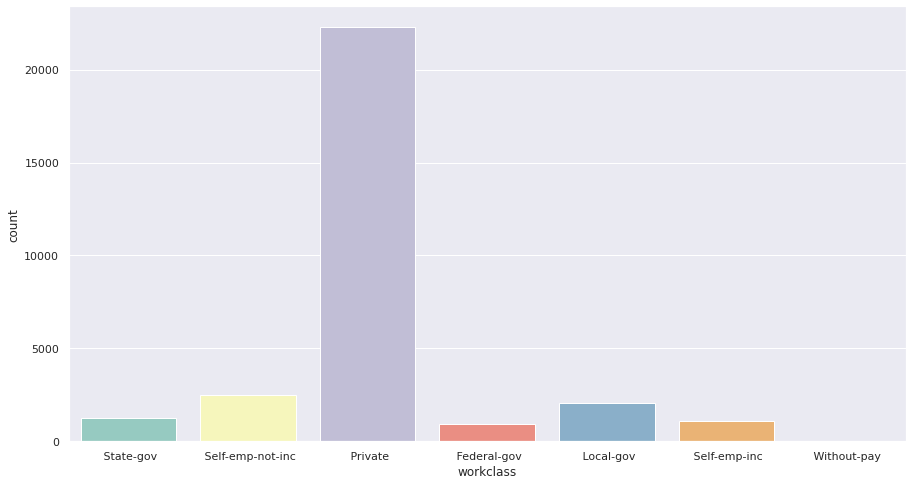

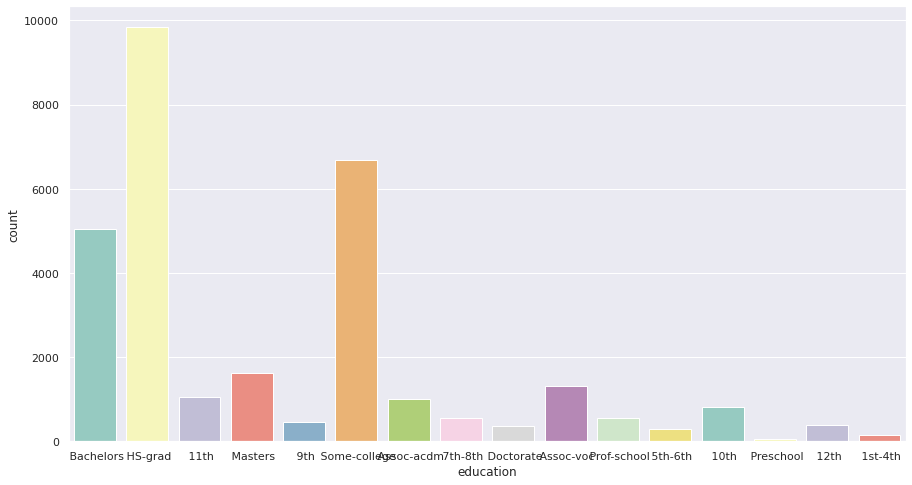

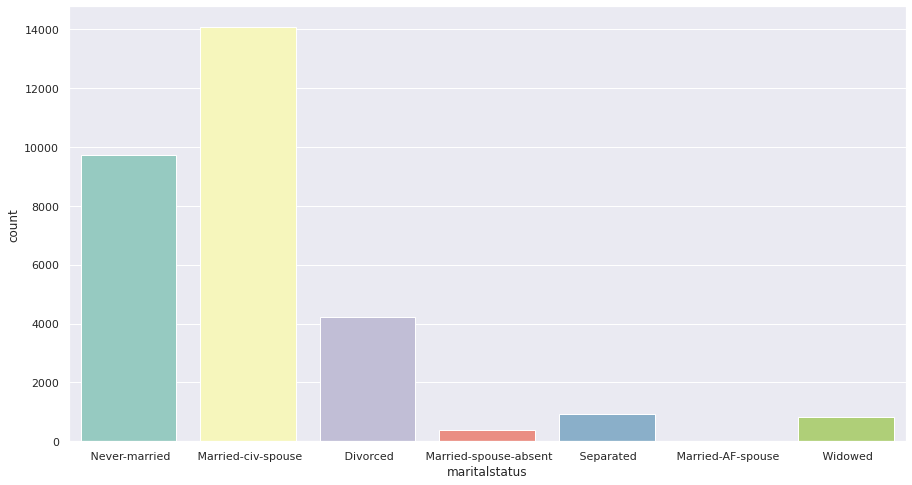

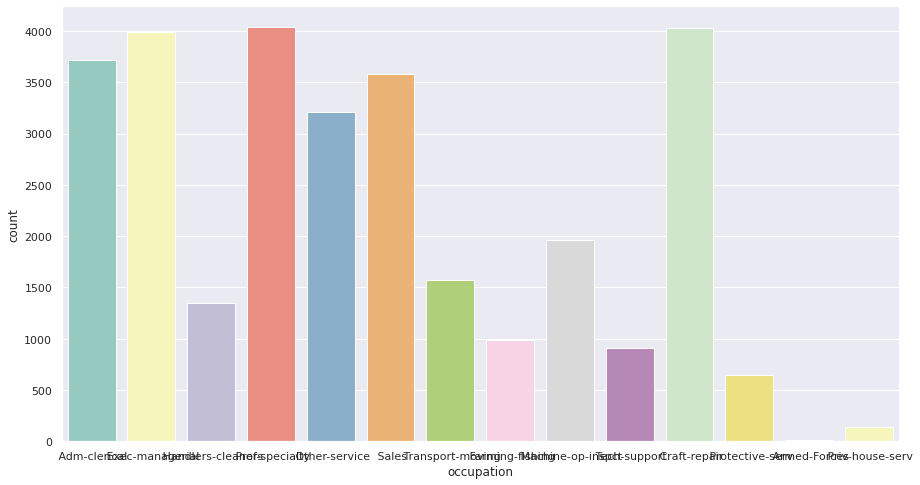

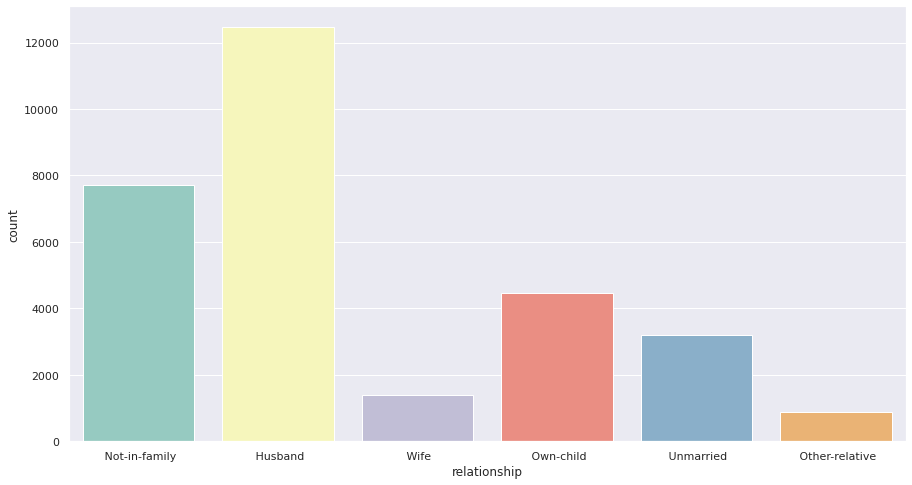

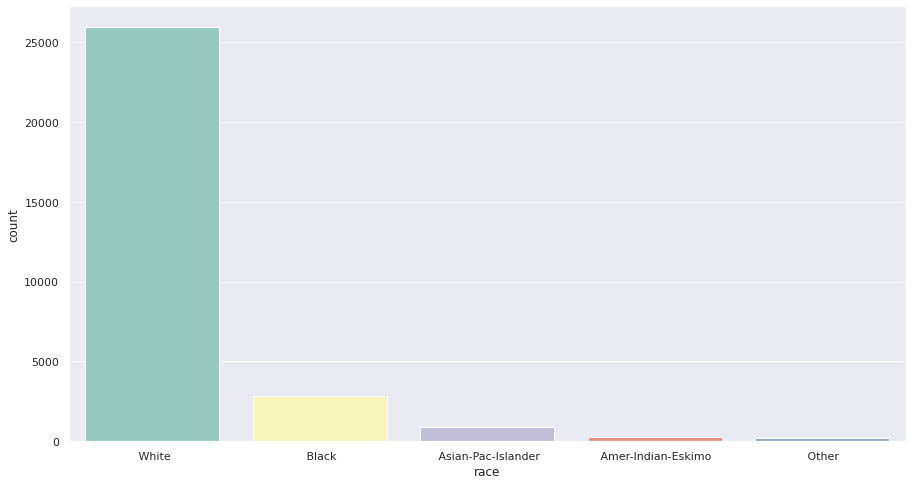

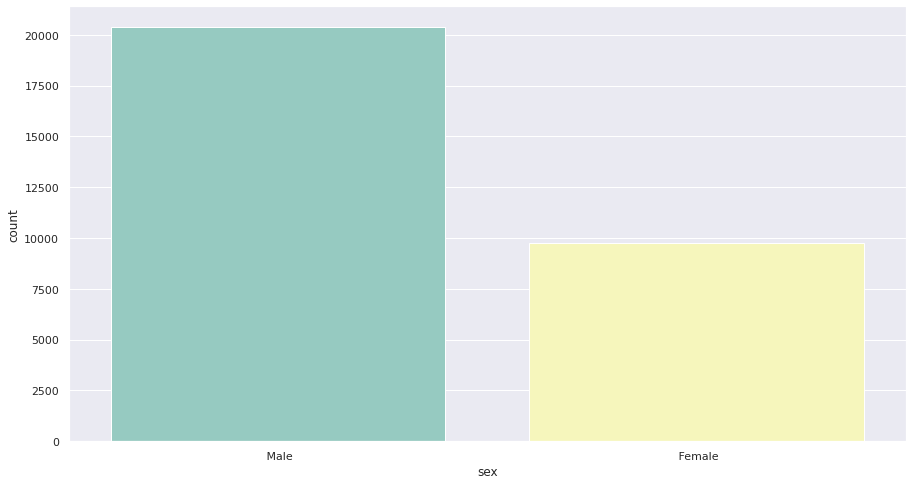

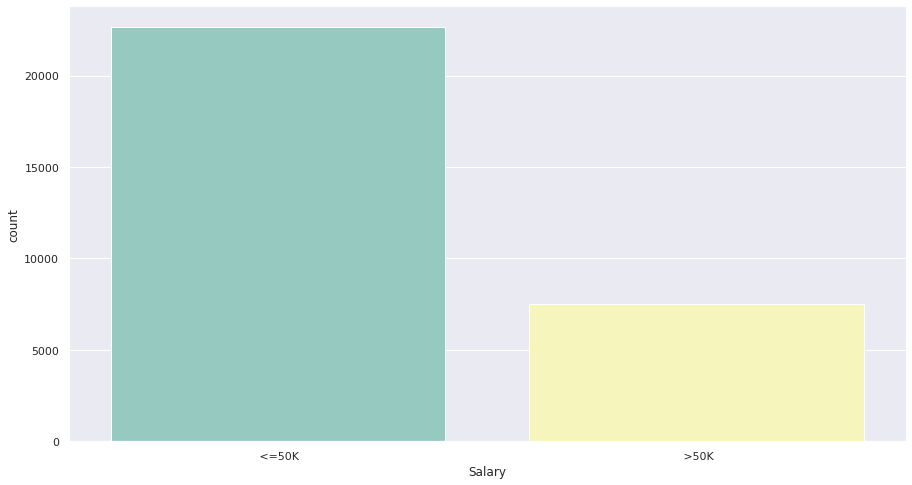

In [ ]:
# countplot for all categorical columns
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = train_data, palette = 'Set3');

In [ ]:
# printing unique values from each categoricla columns

print('workclass',train_data.workclass.unique())
print('education',train_data.education.unique())
print('maritalstatus',train_data['maritalstatus'].unique())
print('occupation',train_data.occupation.unique())
print('relationship',train_data.relationship.unique())
print('race',train_data.race.unique())
print('sex',train_data.sex.unique())
print('native',train_data['native'].unique())
print('Salary',train_data.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras

In [ ]:
train_data[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,43.959110
0,<=50K,36.608264


<Figure size 1440x360 with 0 Axes>

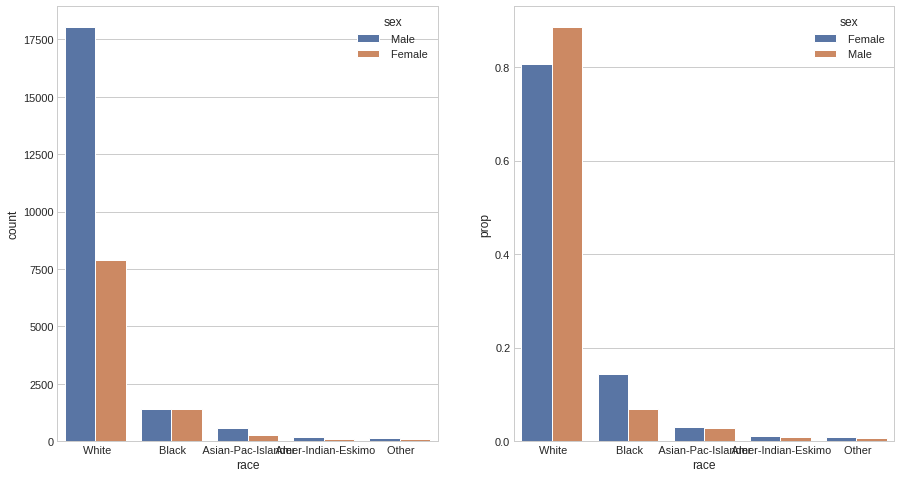

In [ ]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "sex"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=train_data, ax=axes[0])

prop_df = (train_data[x]
           .groupby(train_data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


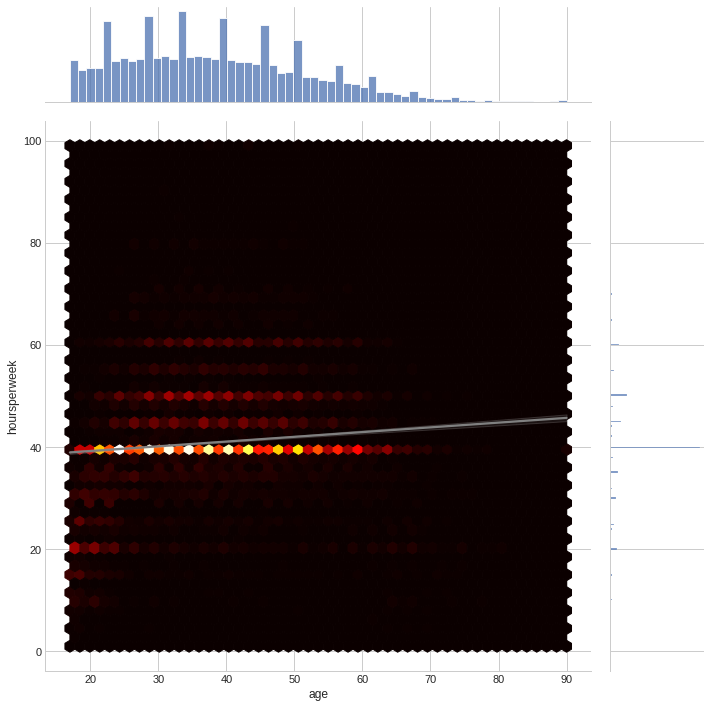

In [ ]:
g = sns.jointplot(x = 'age', 
              y = 'hoursperweek',
              data = train_data, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(train_data.age, train_data['hoursperweek'], ax=g.ax_joint, scatter=False, color='grey')

#### Feature encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [ ]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


#### Test-Train-Split

In [ ]:
drop_elements = ['education', 'native', 'Salary']
X = train_data.drop(drop_elements, axis=1)

In [ ]:
y = train_data['Salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Building SVM Model

In [ ]:
from sklearn import metrics

svc = SVC()
svc.fit(X_train, y_train)
# make predictions
prediction = svc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      7466
           1       0.86      0.28      0.42      2488

    accuracy                           0.81      9954
   macro avg       0.83      0.63      0.65      9954
weighted avg       0.82      0.81      0.77      9954

[[7355  111]
 [1789  699]]
Accuracy: 0.8091219610206952
Precision: 0.8629629629629629
Recall: 0.2809485530546624


#### Testing it on new test data from SalaryData_Test(1).csv

In [ ]:
drop_elements = ['education', 'native', 'Salary']
X_new = test_data.drop(drop_elements, axis=1)

y_new = test_data['Salary']

In [ ]:
# make predictions
new_prediction = svc.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     11360
           1       0.87      0.26      0.40      3700

    accuracy                           0.81     15060
   macro avg       0.84      0.63      0.65     15060
weighted avg       0.82      0.81      0.77     15060

[[11216   144]
 [ 2727   973]]
Accuracy: 0.8093625498007968
Precision: 0.8710832587287377
Recall: 0.26297297297297295


### Building SVM model with Hyper Parameters kernel='rbf',gamma=15, C=1

In [ ]:
model = SVC(kernel='rbf',gamma=15, C=1)

In [ ]:
model.fit(X_train, y_train)
# make predictions
prediction = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7466
           1       0.56      0.08      0.15      2488

    accuracy                           0.75      9954
   macro avg       0.66      0.53      0.50      9954
weighted avg       0.71      0.75      0.68      9954

[[7304  162]
 [2280  208]]
Accuracy: 0.754671488848704
Precision: 0.5621621621621622
Recall: 0.08360128617363344


#### Testing above model on SalaryData_Test(1).csv

In [ ]:
# make predictions
new_prediction = model.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86     11360
           1       0.55      0.07      0.13      3700

    accuracy                           0.76     15060
   macro avg       0.66      0.53      0.49     15060
weighted avg       0.71      0.76      0.68     15060

[[11147   213]
 [ 3437   263]]
Accuracy: 0.7576361221779548
Precision: 0.5525210084033614
Recall: 0.07108108108108108


### Building SVM model with Hyper Parameters kernel='linear',gamma=0.22, C=0.1

In [ ]:
model_2 = SVC(kernel='linear',gamma=0.22, C=1)

In [ ]:
model_2.fit(X_train, y_train)
# make predictions
prediction = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7466
           1       0.56      0.08      0.15      2488

    accuracy                           0.75      9954
   macro avg       0.66      0.53      0.50      9954
weighted avg       0.71      0.75      0.68      9954

[[7304  162]
 [2280  208]]
Accuracy: 0.754671488848704
Precision: 0.5621621621621622
Recall: 0.08360128617363344


#### Testing above model on SalaryData_Test(1).csv

In [ ]:
# make predictions
new_prediction = model_2.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.77      0.29      0.42      3700

    accuracy                           0.80     15060
   macro avg       0.79      0.63      0.65     15060
weighted avg       0.80      0.80      0.77     15060

[[11044   316]
 [ 2639  1061]]
Accuracy: 0.8037848605577689
Precision: 0.7705156136528686
Recall: 0.28675675675675677
